In [1]:
!ls ../data

le01.m4a le04.m4a le07.m4a le10.m4a st03.m4a st06.m4a st09.m4a
le02.m4a le05.m4a le08.m4a st01.m4a st04.m4a st07.m4a st10.m4a
le03.m4a le06.m4a le09.m4a st02.m4a st05.m4a st08.m4a


In [4]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np

In [3]:
st01 = AudioSegment.from_file('../data/st01.m4a', 'm4a')

In [5]:
st01_sample = np.array(st01.get_array_of_samples())

In [6]:
st01_sample.shape

(363744,)

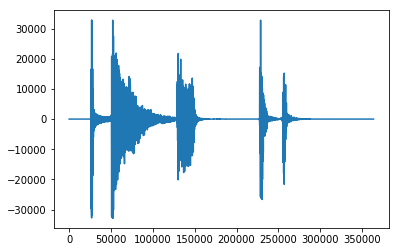

In [7]:
plt.plot(st01_sample)

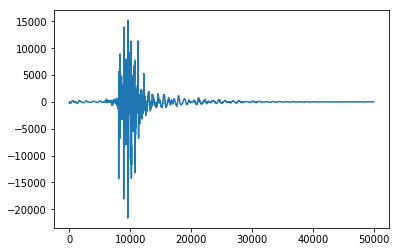

In [26]:
r_idx = np.random.choice(st01_sample.shape[0] - 50000)
st01_frag = st01_sample[r_idx: r_idx + 50000]
plt.plot(st01_frag)

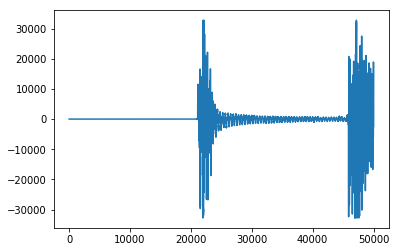

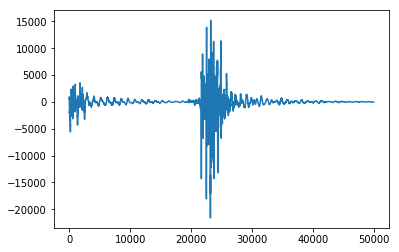

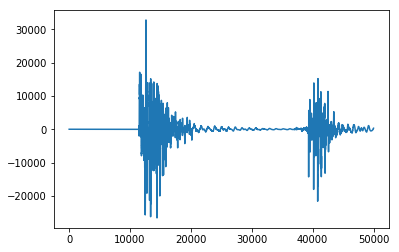

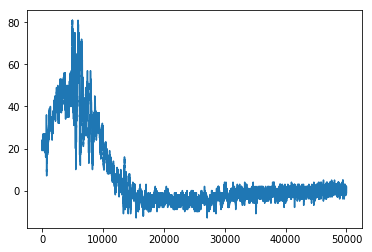

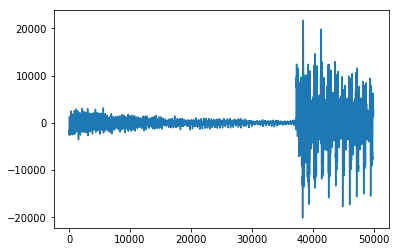

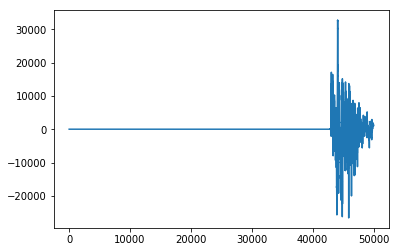

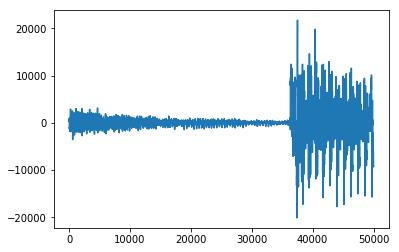

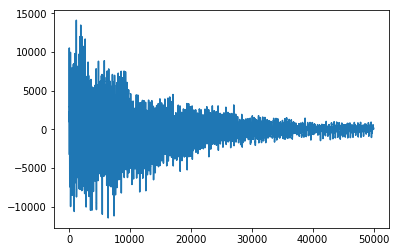

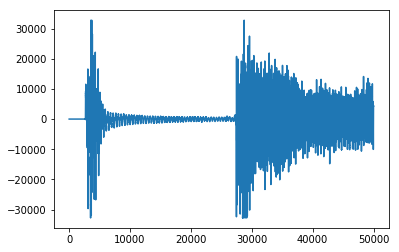

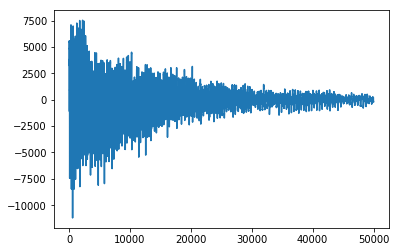

In [27]:
for _ in range(10):
    r_idx = np.random.choice(st01_sample.shape[0] - 50000)
    st01_frag = st01_sample[r_idx: r_idx + 50000]
    plt.plot(st01_frag)
    plt.show()

In [ ]:
# Data loader, processor, augmentation
%matplotlib inline
import matplotlib.pyplot as plt
import pathlib
from pydub import AudioSegment
import numpy as np

sounds = []
g_class = [] # Stratocaster: 0, Les Paul: 1
f_names = []
datas = []
specs = []

for f_name in pathlib.Path('../data').iterdir():
    
    sounds.append(AudioSegment.from_file('../data/' + f_name.name, 'm4a'))
    datas.append(np.array(AudioSegment.from_file('../data/' + f_name.name, 'm4a').get_array_of_samples()))
    
    # Augmentation
    
    for i in range(100):
    g_class.append(int('le' in f_name.name))
    f_names.append(('_' + i + '.').join(f_name.name.split('.')))
    

    
    data = datas[-1][50000: 100000]
    sampling_rate = 48000
    NFFT = 1024 
    OVERLAP = NFFT / 2 
    frame_length = data.shape[0] 
    split_number = len(np.arange((NFFT / 2), frame_length, (NFFT - OVERLAP))) 

    window = np.hamming(NFFT)  

    spec = np.zeros([split_number, NFFT // 4]) 


    pos = 0

    for fft_index in range(split_number):
        frame = data[int(pos):int(pos+NFFT)]
        if len(frame) == NFFT:
            windowed = window * frame  
            fft_result = np.fft.rfft(windowed)

            fft_data2 = np.real(fft_result[:int(len(fft_result)/2)]) 
            fft_data2 = np.log(fft_data2** 2)  

            for i in range(len(spec[fft_index])):
                spec[fft_index][-i-1] = fft_data2[i]

            pos += (NFFT - OVERLAP)
    
    specs.append(spec.T)
